# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
!pip install newsapi-python

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()

True

In [7]:
# Create a newsapi client
Api_key = os.getenv("News_API_Key")
type(Api_key)


str

In [10]:
news_api = NewsApiClient(api_key=Api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_news=news_api.get_everything(q="Bitcoin",language="en")

In [12]:
# Fetch the Ethereum news articles
ethereum_news=news_api.get_everything(q="Ethereum",language="en")

In [15]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "neutral":neu,
            "negative":neg
        })
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "neutral", "negative"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,neutral,negative
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.923,0.000
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,1.000,0.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.895,0.000
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.917,0.083
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000


In [23]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "neutral":neu,
            "negative":neg
        })
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "neutral", "negative"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,neutral,negative
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,1.000,0.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.948,0.000
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.962,0.000
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.877,0.067


In [71]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.025825,0.048700,0.918250,0.033050
std,0.366588,0.055739,0.055389,0.041999
min,-0.440400,0.000000,0.787000,0.000000
25%,-0.374150,0.000000,0.907750,0.000000
50%,0.000000,0.045000,0.923000,0.000000
75%,0.328950,0.074000,0.942000,0.078500
max,0.680800,0.185000,1.000000,0.101000


In [34]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.164365,0.053050,0.938200,0.008700
std,0.272452,0.065873,0.066563,0.021502
min,-0.153100,0.000000,0.783000,0.000000
25%,0.000000,0.000000,0.894000,0.000000
50%,0.000000,0.039500,0.951000,0.000000
75%,0.406800,0.090250,1.000000,0.000000
max,0.757900,0.217000,1.000000,0.067000


In [24]:
ethereum_df["positive"].mean()

0.05305

In [25]:
bitcoin_df["positive"].mean()

0.04870000000000001

In [28]:
ethereum_df["compound"].max()

0.7579

In [29]:
bitcoin_df["compound"].max()

0.6808

In [30]:
ethereum_df["positive"].max()

0.217

In [37]:
bitcoin_df.head()

,date,text,compound,positive,neutral,negative
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.923,0.000
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,1.000,0.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.895,0.000
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.917,0.083
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin=0.0487; ethereum=.053 hence ethereum has the highest mean positive score.

Q: Which coin had the highest compound score?

A: bitcoin=0.6808;  ethereum=0.7579 hence ethereum has the highest compound score.


Q. Which coin had the highest positive score?

A: bitcoin=0.185 ; ethereum= 0.217 hence ethereum has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [42]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary

sw_addon={'char', 'reuters', 'ha', 'cryptocurrency', 'million','…'}


sw=sw.union(sw_addon)



In [43]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Remove the punctuation from text
    for word in text:
        if word in punctuation:
            text = text.replace(word, "")
   
    # Create a tokenized list of the words
    words = word_tokenize(text)   
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stopwords
    tokens = [word.lower() for word in lem if word.lower() not in sw]    
    
    return tokens

In [44]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []

for i in range(len(bitcoin_df)):
    try:
        bitcoin_tokens.append(tokenizer(bitcoin_df['text'][i]))
    except AttributeError:
        pass

bitcoin_df['tokens'] = bitcoin_tokens
bitcoin_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.923,0.000,"[muskmark, ralstonafp, via, getty, images, elo..."
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,1.000,0.000,"[denis, rusinovich, set, mining, company, mave..."
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.895,0.000,"[el, salvador, introduced, bitcoin, legal, ten..."
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.917,0.083,"[officially, building, open, bitcoin, mining, ..."
4,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000,"[new, blog, post, company, said, 4836, eth, 44..."


In [104]:
# Create a new tokens column for Ether
ethereum_tokens = []

for i in range(len(ethereum_df)):
    try:
        ethereum_tokens.append(tokenizer(ethereum_df['text'][i]))
    except AttributeError:
        pass

ethereum_df['tokens'] = ethereum_tokens
ethereum_df.head()

,date,text,compound,positive,neutral,negative,tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000,"[new, blog, post, company, said, 4836, eth, 44..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,1.000,0.000,"[hackers, made, roughly, 15, ethereum, cryptoc..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.948,0.000,"[level, new, mayor, simply, employing, ageold,..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.962,0.000,"[back, september, robinhood, announced, plan, ..."
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.877,0.067,"[trading, platform, cryptocom, lost, 34, worth..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [45]:
from collections import Counter
from nltk import ngrams

In [ ]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [ ]:
# Define the counter function
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [50]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
n=2
bigram_counts_btc = []
for i in range(len(bitcoin_df['text'])):
    bigram_counts_btc.append(Counter(ngrams(word_tokenize(bitcoin_df['text'][i]), n)))

In [99]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(corpus): 
#    Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
n=2
bigram_counts_eth = []
for i in range(len(ethereum_df['text'])):
    bigram_counts_eth.append(Counter(ngrams(word_tokenize(ethereum_df['text'][i]), n)))

In [100]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [101]:
# Use token_count to get the top 10 words for Bitcoin
tokens_btc = []
for i in range(len(bitcoin_df['tokens'])):
    for n in range(len(bitcoin_df['tokens'][i])):
        tokens_btc.append(bitcoin_df['tokens'][i][n])
token_count(tokens_btc, N=10)

[('bitcoin', 15),
 ('mining', 7),
 ('company', 7),
 ('…', 7),
 ('new', 6),
 ('open', 5),
 ('el', 4),
 ('building', 4),
 ('system', 4),
 ('images', 3)]

In [105]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

tokens_eth = []
for i in range(len(ethereum_df['tokens'])):
    for n in range(len(ethereum_df['tokens'][i])):
        tokens_eth.append(ethereum_df['tokens'][i][n])
token_count(tokens_eth, N=10)

[('ethereum', 9),
 ('new', 8),
 ('bitcoin', 6),
 ('…', 5),
 ('crypto', 5),
 ('company', 4),
 ('digital', 4),
 ('2021', 4),
 ('blockchains', 4),
 ('blog', 3)]

In [103]:
ethereum_df

,date,text,compound,positive,neutral,negative
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,1.000,0.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,1.000,0.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.948,0.000
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.962,0.000
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.877,0.067
5,2022-01-18,Ethereum is a digital platform that runs on bl...,0.4019,0.085,0.915,0.000
6,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.940,0.060
7,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.783,0.000
8,2022-01-20,Crypto bros never tire of sharing their utopia...,-0.0557,0.041,0.911,0.047
9,2022-01-19,The crypto market's whiplash volatility can ma...,0.5574,0.129,0.871,0.000


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

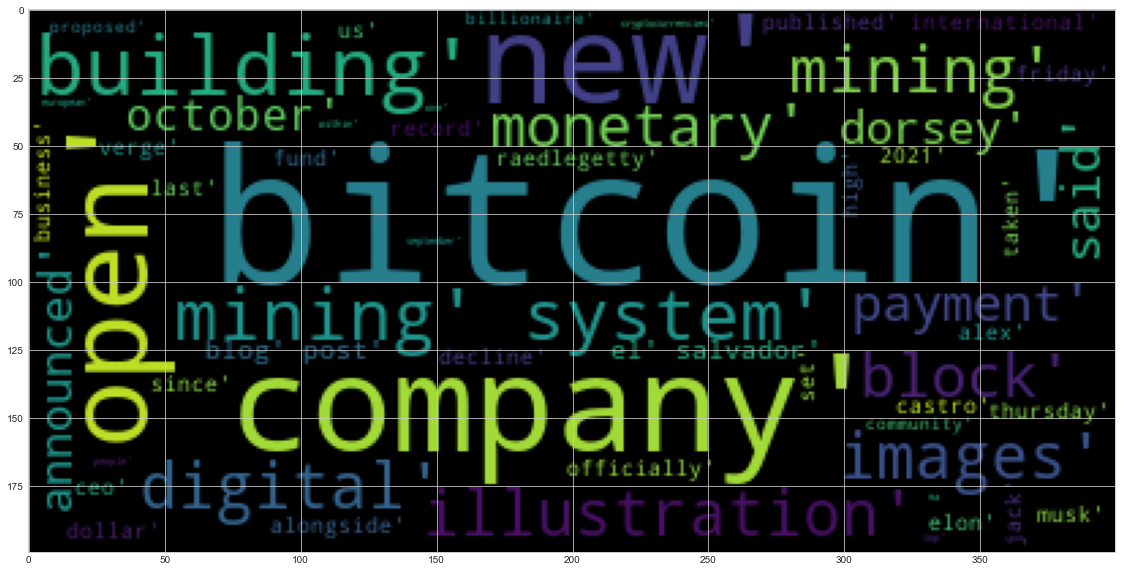

In [57]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
#big_string = ' '.join(corpus)
#input_text = process_text(big_string)

# Generate the wordcloud
wc_btc = WordCloud().generate(str(tokens_btc))
plt.imshow(wc_btc)

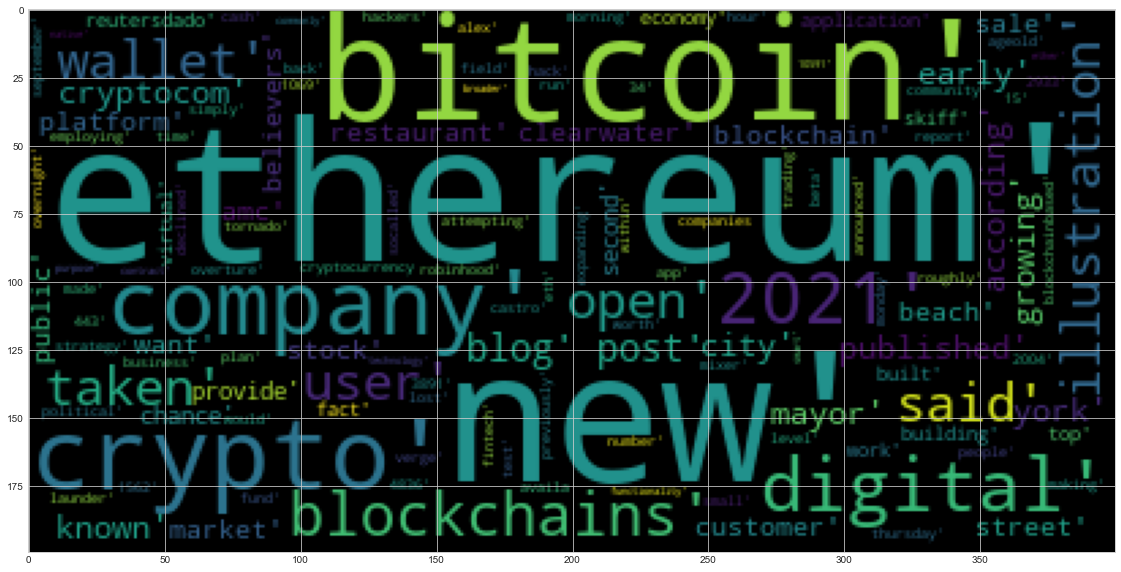

In [106]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_eth = WordCloud().generate(str(tokens_eth))
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [62]:
import spacy
from spacy import displacy

In [63]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install spacy

In [64]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [65]:
# Concatenate all of the Bitcoin text together
btc_text = ''
for text in bitcoin_df['text']:
    btc_text += str(text) 

In [66]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!

In [69]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [70]:
# List all Entities
btc_ner.ents

(Getty Images,
 Elon Musk,
 Nick Szabo,
 Satoshi Nakamoto,
 Denis Rusinovich,
 Maveric Group,
 Kazakhstan,
 2017,
 China,
 Russia,
 chars]El Salvador,
 US,
 2021,
 Alex Castro,
 Verge,
 The International Monetary Fund’s,
 El,
 Bitcoin,
 Joe Raedle/Getty Images,
 Square,
 Bitcoin,
 4,836,
 ETH,
 443,
 Alex Castro,
 Verge,
 the early hours,
 Thursday,
 morning,
 Saturday,
 more than 50%,
 November,
 more than $,
 Jack Dorsey,
 Twitter,
 first,
 October last year,
 the "Giga Texas,
 Elon Musk,
 Friday,
 Fintech,
 New York City,
 Richard ODell,
 house,
 October,
 Poulde,
 chars]Russia,
 Thursday,
 Russian,
 Bitcoin,
 El Salvador,
 US,
 The International Monetary Fund,
 El Salvador,
 Changpeng,
 Binance,
 Dorsey,
 June,
 Joe Raedle/Getty Images,
 this week,
 September,
 Robinhood,
 the European Unions,
 European Securities,
 Crypto.com,
 about $34 million,
 Monday,
 Bitcoin,
 October 19, 2021,
 REUTERS,
 Reuters,
 6.13%,
 47,606.92,
 Tuesday,
 Jan 7,
 Reuters,
 Friday,
 as much as 5%,
 late

---

### Ethereum NER

In [72]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = ''
for text in ethereum_df['text']:
    eth_text += str(text) 

In [73]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_text)
# Add a title to the document
# YOUR CODE HERE!

In [74]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [75]:
# List all Entities
# YOUR CODE HERE!
eth_ner.ents

(4,836,
 ETH,
 443,
 Alex Castro,
 Verge,
 the early hours,
 Thursday,
 morning,
 roughly $15 million,
 Crypto.com,
 Tornado Cash,
 Fintech,
 New York City,
 September,
 Robinhood,
 Crypto.com,
 about $34 million,
 Monday,
 Ethereum,
 Street Restaurant,
 Clearwater Beach,
 Florida.@ClwBeachCrypto/Twitter,
 Clearwater Beach,
 Florida,
 Crypto Street Restaura,
 Ethereum,
 418%,
 2021,
 AMC Entertainment,
 AMC,
 GME,
 Ethereums,
 more than 650%,
 Vitalik Buterin,
 Ethereum,
 Tenys,
 a breakthrough year,
 $14 billion,
 2021.</li><li,
 NFT,
 OPEN,
 second,
 OPEN,
 second,
 Bloomberg TV,
 Crypto.com,
 Kris Marszalek,
 400,
 Richard ODell,
 house,
 October,
 Poulde,
 chars]New York City,
 Eric Adams,
 first,
 Friday,
 Bitcoin and Ethereum,
 Coinbase Global Inc.,
 U.S.,
 early December 2021,
 Skiff,
 MetaMask,
 Skiff,
 Bitcoin,
 January 8, 2021,
 REUTERS,
 Dado Ruvic/File PhotoJan,
 21,
 Reuters,
 9.28%,
 36,
 Bitcoin, Ethereum,
 DogeCoin,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/Illustration,
 M

---